## <html><body><center><h1 style="color:#66325c">Heart Failure Analysis</h1></center></body></html>

In [1]:
# loading required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##   <h3 style="color:#2f4470">loading the data </h3>

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## <h3 style="color:#2f4470">checking the shape of data</h3>

In [3]:
df.shape

(918, 12)

##  <h3 style="color:#2f4470">There are total 918 rows and 12 columns.</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# statistical description of the data.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## <h3 style="color:#2f4470">These are unique numbers in this dataset. </h3>

In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## 
<h3 style="color:#2f4470">We can see the number of unique values for each column.</h3>

In [7]:
df.shape

(918, 12)

## <h3 style="color:#2f4470">removing duplicates from this dataset</h3>

In [8]:
df.drop_duplicates(keep="first",inplace=True)

In [9]:
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

## <h3 style="color:#2f4470"> The distribution of data is shown in the above plot we can observe that if persons's age is more than 40 Heart failure is more likely to happen to those people. </h3>

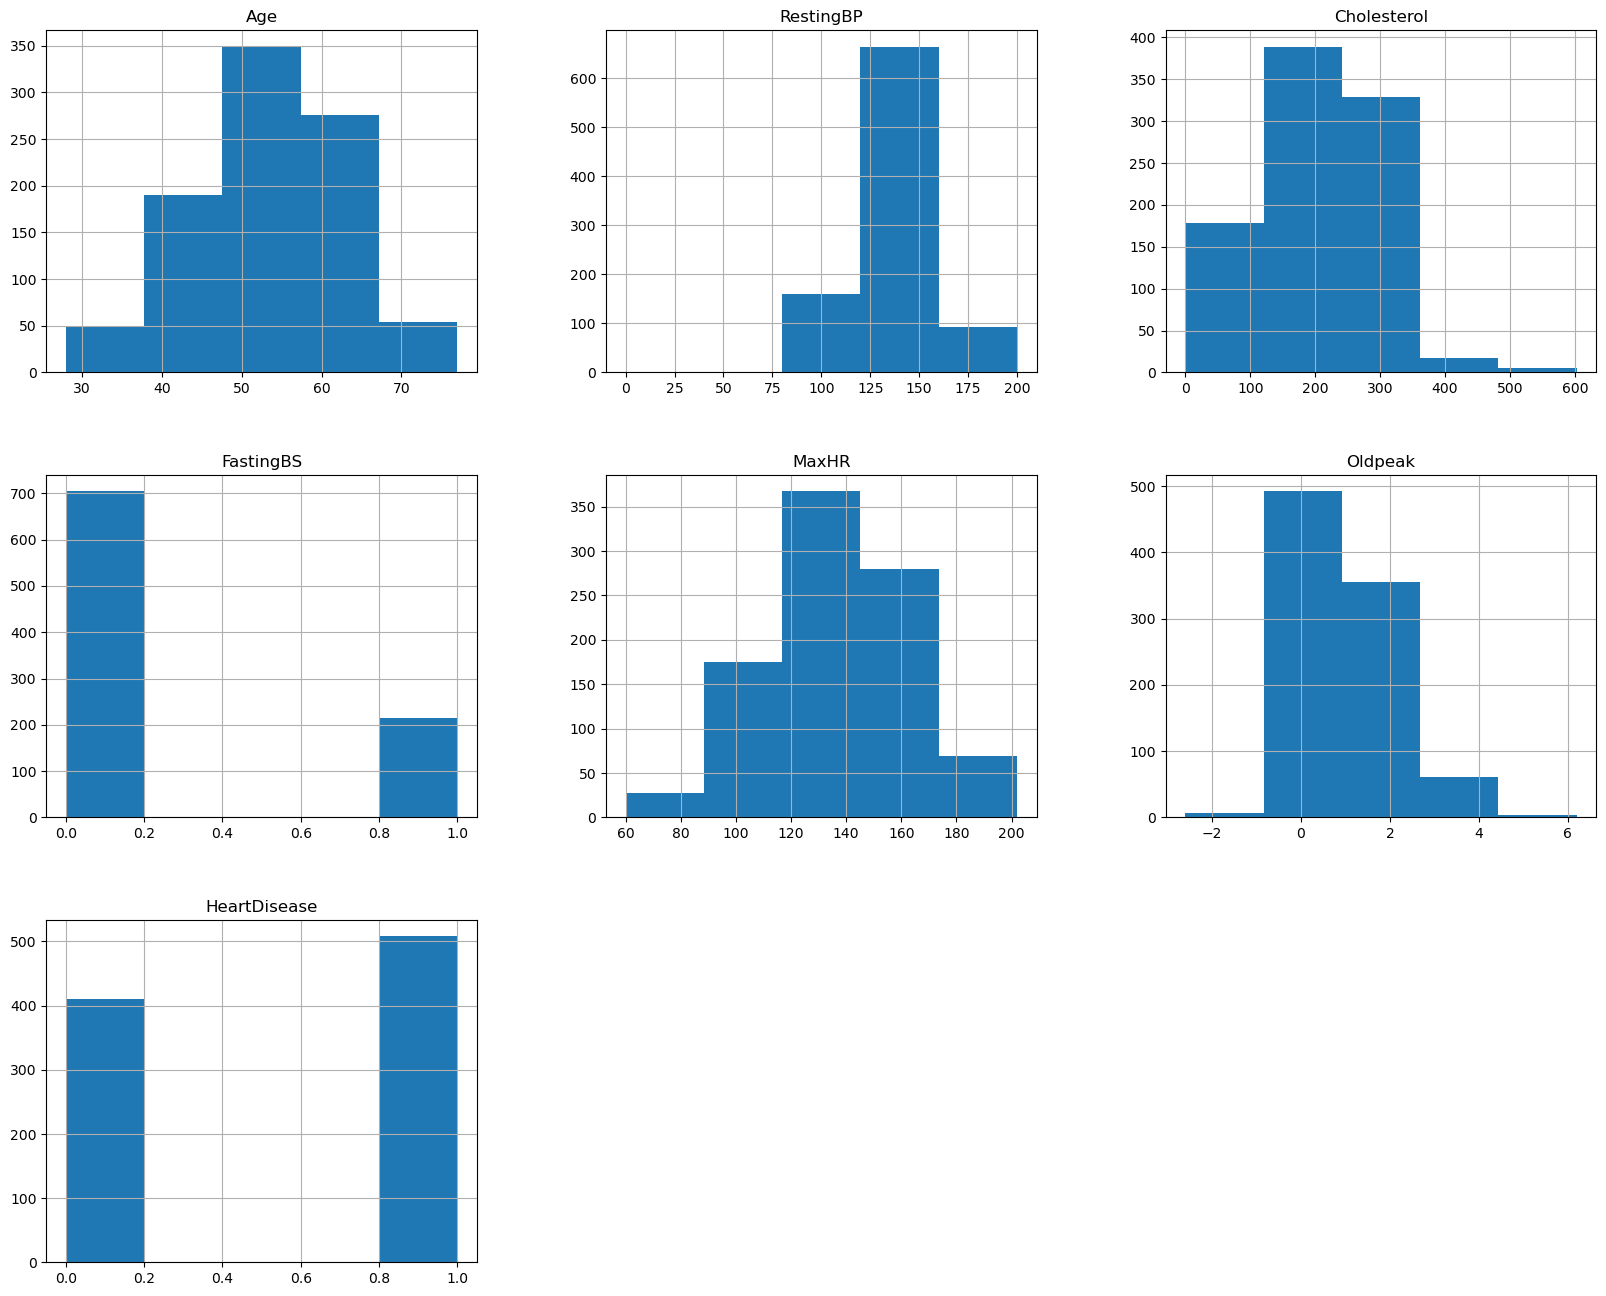

In [10]:
df.hist(figsize=(20,16),bins=5)
plt.show()

## <h3 style="color:#2f4470">As we can clearly see, only 21.02% of the heart failure patients are female in our observation. This means that we have more number of male patients when compared to females in the dataset.</h3>

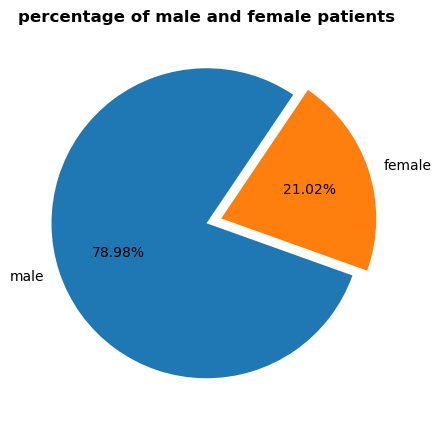

In [11]:
plt.figure(figsize=(5,7))
plt.title("percentage of male and female patients",fontweight="bold")
values = df["Sex"].value_counts()
plt.pie(values, labels=["male","female"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()

## <h3 style="color:#2f4470">All the numeric columns are in num_cols. </h3>

In [12]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

## <h3 style="color:#2f4470">All the object columns are in cat_cols.</h3>

In [13]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## <h3 style="color:#2f4470">As compared to females more number of males are suffering from heart disease. </h3>

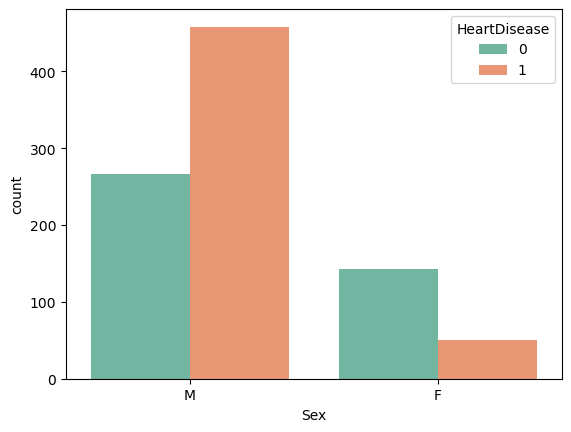

In [14]:
sns.countplot(data=df,x="Sex",hue="HeartDisease", palette='Set2')
plt.show()

## <h3 style="color:#2f4470"> There are four types of chest pain, There is a high chances of having heart disease if people are suffering because of ASY chest pain and comparatively very low chances of having heart disease if people having ATA chest pain type. </h3>

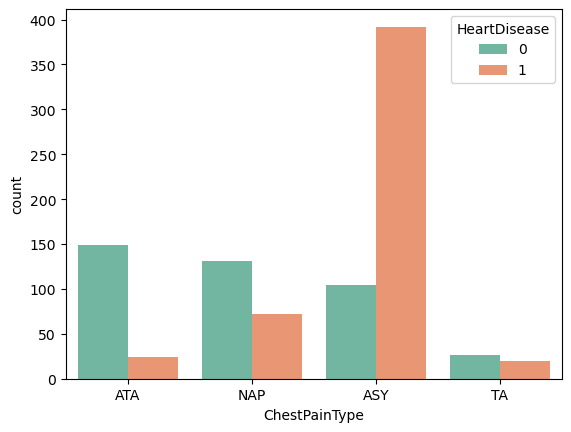

In [15]:
sns.countplot(data=df,x="ChestPainType",hue="HeartDisease",palette='Set2')
plt.show()
    

## <h3 style="color:#2f4470">Three types of Resting electrocardiographic results are there. </h3>

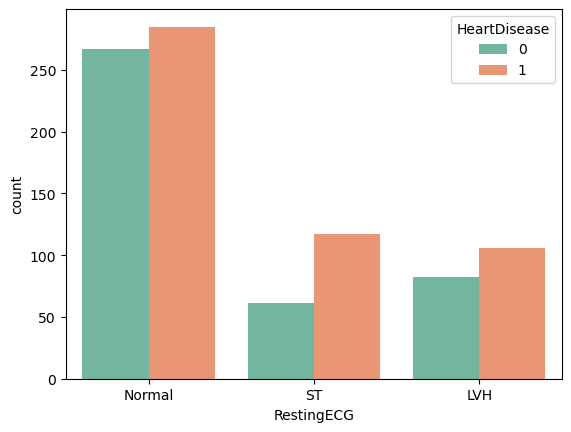

In [16]:
sns.countplot(data=df,x="RestingECG",hue="HeartDisease", palette='Set2')
plt.show()    

## <h3 style="color:#2f4470">Angina is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder.<br>We can observe that people with Exercise Angina is more likely to have heart problem. </h3>

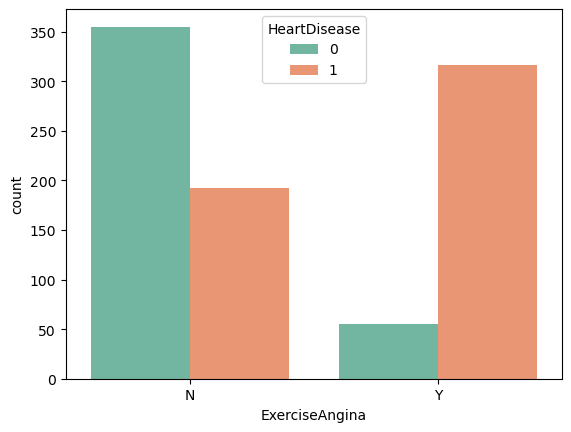

In [17]:
sns.countplot(data=df,x="ExerciseAngina",hue="HeartDisease", palette='Set2')
plt.show()

## <h3 style="color:#2f4470">The category of People with flat st_slope are in more complex situation than the others. As in ST_slope flat category there is more number of heart patients. </h3>

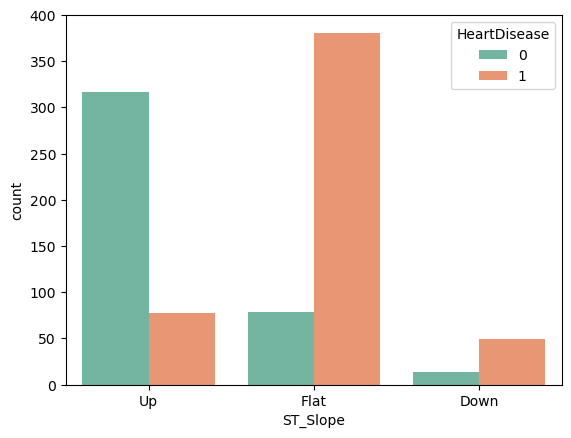

In [18]:
sns.countplot(data=df,x="ST_Slope",hue="HeartDisease", palette='Set2')
plt.show()

## <h3 style="color:#2f4470">We can see the distribution of target in the plot.<br>The target here is balanced.<br>As we can see in the above plot there are only two categories,so it is a binary classification problem</h3>

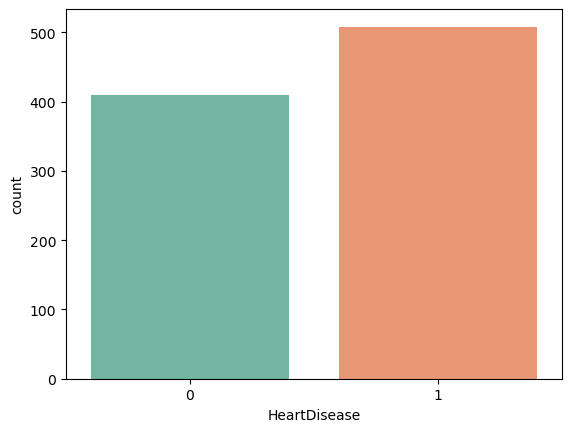

In [19]:
sns.countplot(data=df,x="HeartDisease", palette='Set2')
plt.show()

## <h3 style="color:#2f4470">Splitting and test data</h3>

In [20]:
features=df.drop(["HeartDisease"],axis=1)
target=df["HeartDisease"]

In [21]:
features.shape

(918, 11)

In [22]:
target.shape

(918,)